In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import pickle
import time
import sklearn
import warnings

warnings.filterwarnings(action='ignore', category=FutureWarning)
# warnings.filterwarnings(action='ignore', category=ConvergenceWarning)

In [2]:
SCRATCH_DIR = "/scratch/siads696f23_class_root/siads696f23_class/psollars"

In [3]:
start_time = time.time()
predictive_features_2019 = pd.read_parquet(f"{SCRATCH_DIR}/predictive_features_2019.parquet")
end_time = time.time()

print(f"Elapsed time: {(end_time - start_time):.4f} seconds")

Elapsed time: 4.8250 seconds


In [4]:
# From dataframe_filtering_airport_2019.ipynb
airports = ['ATL', 'ORD', 'DFW', 'DEN', 'CLT'] #, 'LAX', 'IAH', 'PHX', 'SFO', 'LGA']

In [9]:
# WN    Southwest Airlines Co.
# DL    Delta Air Lines, Inc.
# AA    American Airlines Inc.
# OO    SkyWest Airlines
# UA    United Airlines, Inc.
# YX    Republic Airways Inc
# MQ    Envoy Air Inc.
# B6    Jetblue Airways Corporation
# OH    PSA Airlines, Inc.
# AS    Alaska Airlines Inc.
# 9E    Endeavor Air
# YV    Mesa Airlines, Inc.
# NK    Spirit Airlines
# F9    Frontier Airlines, Inc.
# EV    Tatonduk Outfitters Limited dba Eve Air Alaska dba Everts Air Cargo
# G4    Allegiant Air LLC
# HA    Hawaiian Airlines, Inc.

airlines = list(predictive_features_2019.value_counts("Reporting_Airline").head(5).index)

airlines

['WN', 'DL', 'AA', 'OO', 'UA']

In [1]:
num_cols = [
    "CRSDepTime",
    "CRSArrTime",
    "Origin_LATITUDE",
    "Origin_LONGITUDE",
    "Dest_LATITUDE",
    "Dest_LONGITUDE",
]

cat_cols = [
    "Month",
    "DayOfWeek",
    # "Reporting_Airline",
    "Tail_Number",
    "DistanceGroup",
    "YEAR MFR",
    "engine_manufacturer",
    "engine_model",
    "aircraft_manufacturer",
    "aircraft_model",
]

In [22]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer


def preprocess_data(df):
    X = df.drop("delayed", axis=1)
    y = df["delayed"]

    preprocessor = ColumnTransformer(
        transformers=[
            ("num", StandardScaler(), num_cols),
            ("cat", OneHotEncoder(), cat_cols),
        ]
    )

    X_transformed = preprocessor.fit_transform(X)
    
    return X_transformed, y

In [23]:
from sklearn.linear_model import LogisticRegression

def fit_logistic_regression(X_train, y_train):
    logistic_regression = LogisticRegression(solver='saga', max_iter=1000)
    logistic_regression.fit(X_train, y_train)

    return logistic_regression

In [25]:
from sklearn.model_selection import train_test_split
import pickle


for airport in airports:
    airport_df = pd.read_parquet(f"{SCRATCH_DIR}/predictive_features_{airport}_2019.parquet")
    
    for airline in airlines:
        start_time = time.time()

        airline_df = airport_df[airport_df["Reporting_Airline"].eq(airline)].drop("Reporting_Airline", axis=1)
        
        try:
            X, y = preprocess_data(airline_df)

            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

            model = fit_logistic_regression(X_train, y_train)

            with open(f"{SCRATCH_DIR}/07_logistic_regression/2019_{airport}_{airline}_model.pkl", "wb") as f:
                pickle.dump(model, f)
            with open(f"{SCRATCH_DIR}/07_logistic_regression/2019_{airport}_{airline}_X_test.pkl", "wb") as f:
                pickle.dump(X_test, f)
            with open(f"{SCRATCH_DIR}/07_logistic_regression/2019_{airport}_{airline}_y_test.pkl", "wb") as f:
                pickle.dump(y_test, f)
        except Exception as ex:
            print(f"Unable to process: {airport} - {airline} | {ex}")
        
        end_time = time.time()

        print(f"Processed: {airport} - {airline} | Elapsed: {(end_time - start_time):.4f} seconds")
        

Processed: ATL - WN | Elapsed: 23.2313 seconds
Processed: ATL - DL | Elapsed: 64.9758 seconds
Processed: ATL - AA | Elapsed: 0.9363 seconds
Processed: ATL - OO | Elapsed: 2.3028 seconds
Processed: ATL - UA | Elapsed: 0.2077 seconds
Unable to process: ORD - WN | Found array with 0 sample(s) (shape=(0, 6)) while a minimum of 1 is required by StandardScaler.
Processed: ORD - WN | Elapsed: 0.0350 seconds
Processed: ORD - DL | Elapsed: 0.6393 seconds
Processed: ORD - AA | Elapsed: 9.1021 seconds
Processed: ORD - OO | Elapsed: 6.7102 seconds
Processed: ORD - UA | Elapsed: 44.6573 seconds
Unable to process: DFW - WN | Found array with 0 sample(s) (shape=(0, 6)) while a minimum of 1 is required by StandardScaler.
Processed: DFW - WN | Elapsed: 0.0402 seconds
Processed: DFW - DL | Elapsed: 1.2872 seconds
Processed: DFW - AA | Elapsed: 30.9963 seconds
Processed: DFW - OO | Elapsed: 1.0195 seconds
Processed: DFW - UA | Elapsed: 0.2778 seconds


/sw/pkgs/arc/python3.10-anaconda/2023.03/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Processed: DEN - WN | Elapsed: 68.6105 seconds
Processed: DEN - DL | Elapsed: 1.5458 seconds
Processed: DEN - AA | Elapsed: 0.4176 seconds
Processed: DEN - OO | Elapsed: 3.8074 seconds
Processed: DEN - UA | Elapsed: 23.3691 seconds
Processed: CLT - WN | Elapsed: 0.1687 seconds
Processed: CLT - DL | Elapsed: 0.3906 seconds
Processed: CLT - AA | Elapsed: 72.2735 seconds
Processed: CLT - OO | Elapsed: 0.1488 seconds


/sw/pkgs/arc/python3.10-anaconda/2023.03/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Processed: CLT - UA | Elapsed: 0.4164 seconds


/sw/pkgs/arc/python3.10-anaconda/2023.03/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Processed: LAX - WN | Elapsed: 30.4665 seconds


/sw/pkgs/arc/python3.10-anaconda/2023.03/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Processed: LAX - DL | Elapsed: 27.6197 seconds
Processed: LAX - AA | Elapsed: 4.3971 seconds
Processed: LAX - OO | Elapsed: 7.5733 seconds


/sw/pkgs/arc/python3.10-anaconda/2023.03/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Processed: LAX - UA | Elapsed: 17.2829 seconds
Unable to process: IAH - WN | Found array with 0 sample(s) (shape=(0, 6)) while a minimum of 1 is required by StandardScaler.
Processed: IAH - WN | Elapsed: 0.0258 seconds
Processed: IAH - DL | Elapsed: 0.1978 seconds
Processed: IAH - AA | Elapsed: 0.3477 seconds
Processed: IAH - OO | Elapsed: 0.5754 seconds
Processed: IAH - UA | Elapsed: 43.1796 seconds


/sw/pkgs/arc/python3.10-anaconda/2023.03/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Processed: PHX - WN | Elapsed: 56.4652 seconds
Processed: PHX - DL | Elapsed: 0.3858 seconds
Processed: PHX - AA | Elapsed: 6.9153 seconds
Processed: PHX - OO | Elapsed: 1.2481 seconds


/sw/pkgs/arc/python3.10-anaconda/2023.03/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Processed: PHX - UA | Elapsed: 3.3068 seconds
Processed: SFO - WN | Elapsed: 0.6258 seconds
Processed: SFO - DL | Elapsed: 1.0452 seconds
Processed: SFO - AA | Elapsed: 0.5541 seconds
Processed: SFO - OO | Elapsed: 2.7486 seconds
Processed: SFO - UA | Elapsed: 6.1299 seconds
Processed: LGA - WN | Elapsed: 2.1243 seconds
Processed: LGA - DL | Elapsed: 1.7596 seconds
Processed: LGA - AA | Elapsed: 1.1605 seconds
Processed: LGA - OO | Elapsed: 0.4642 seconds
Processed: LGA - UA | Elapsed: 0.3729 seconds


12 airport/airline combinations seem to have a meaningful amount of data
These are the airline hubs

- Processed: ATL - WN | Elapsed: 23.2313 seconds
- Processed: ATL - DL | Elapsed: 64.9758 seconds
- Processed: ORD - UA | Elapsed: 44.6573 seconds
- Processed: DFW - AA | Elapsed: 30.9963 seconds
- Processed: DEN - WN | Elapsed: 68.6105 seconds
- Processed: DEN - UA | Elapsed: 23.3691 seconds
- Processed: CLT - AA | Elapsed: 72.2735 seconds
- Processed: LAX - WN | Elapsed: 30.4665 seconds
- Processed: LAX - DL | Elapsed: 27.6197 seconds
- Processed: LAX - UA | Elapsed: 17.2829 seconds
- Processed: IAH - UA | Elapsed: 43.1796 seconds
- Processed: PHX - WN | Elapsed: 56.4652 seconds

In [36]:
airport, airline = (
    # ("ATL", "WN")
    # ("ATL", "DL")
    # ("ORD", "UA")
    ("DFW", "AA")
    # ("DEN", "WN")
    # ("DEN", "UA")
#     ("CLT", "AA")
    # ("LAX", "WN")
    # ("LAX", "DL")
    # ("LAX", "UA")
    # ("IAH", "UA")
    # ("PHX", "WN")
)

with open(f"{SCRATCH_DIR}/07_logistic_regression/2019_{airport}_{airline}_model.pkl", "rb") as f:
    model = pickle.load(f)
with open(f"{SCRATCH_DIR}/07_logistic_regression/2019_{airport}_{airline}_X_test.pkl", "rb") as f:
    X_test = pickle.load(f)
with open(f"{SCRATCH_DIR}/07_logistic_regression/2019_{airport}_{airline}_y_test.pkl", "rb") as f:
    y_test = pickle.load(f)


In [37]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    precision_recall_curve,
)

y_pred = model.predict(X_test)

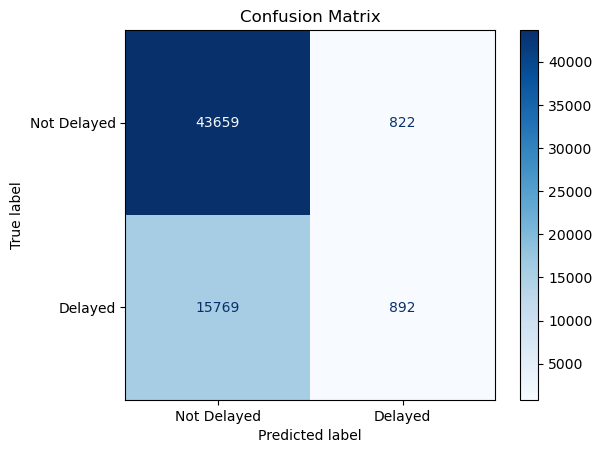

In [38]:
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(
    confusion_matrix=cm, display_labels=["Not Delayed", "Delayed"]
).plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

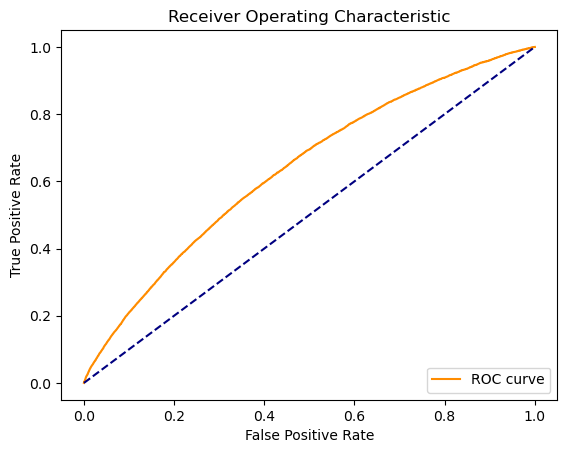

In [39]:
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])

plt.figure()
plt.plot(fpr, tpr, color="darkorange", label="ROC curve")
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()

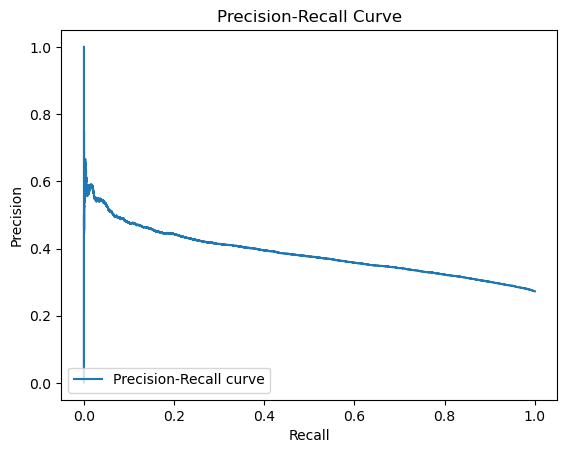

In [40]:
precision, recall, _ = precision_recall_curve(
    y_test, model.predict_proba(X_test)[:, 1]
)

plt.figure()
plt.plot(recall, precision, label="Precision-Recall curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="lower left")
plt.show()

In [41]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

metrics_scores = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}
df_metrics = pd.DataFrame(list(metrics_scores.items()), columns=['Metric', 'Score'])

fig = px.bar(df_metrics, 
             x='Score', 
             y='Metric', 
             orientation='h', 
             color='Metric', 
             text='Score',
             title='Evaluation Metrics')

fig.update_layout(showlegend=False)

fig.show()